<a href="https://colab.research.google.com/github/purusanths/breast-cancer-wisconsin/blob/master/prophet_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <font color="red">Import packages </font>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
cd drive

In [0]:
cd My Drive

In [0]:
cd MSC/Data\ science

In [0]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [0]:
data=pd.read_csv('daily_count.csv')

In [7]:
data.head()

,date,number of users
0,2018-01-01,21
1,2018-01-02,126
2,2018-01-03,150
3,2018-01-04,70
4,2018-01-05,84


In [0]:
data['date']=pd.to_datetime(data['date'])

In [0]:
data['day']=data['date'].dt.day

In [10]:
data.head()

,date,number of users,day
0,2018-01-01,21,1
1,2018-01-02,126,2
2,2018-01-03,150,3
3,2018-01-04,70,4
4,2018-01-05,84,5


In [0]:
data_jan=data[data.date.dt.month==1]

In [0]:
data_2018_jan=data_jan[data_jan.date.dt.year==2018]

In [0]:
data_2019_jan=data_jan[data_jan.date.dt.year==2019]

In [0]:
data_2020_jan=data_jan[data_jan.date.dt.year==2020]

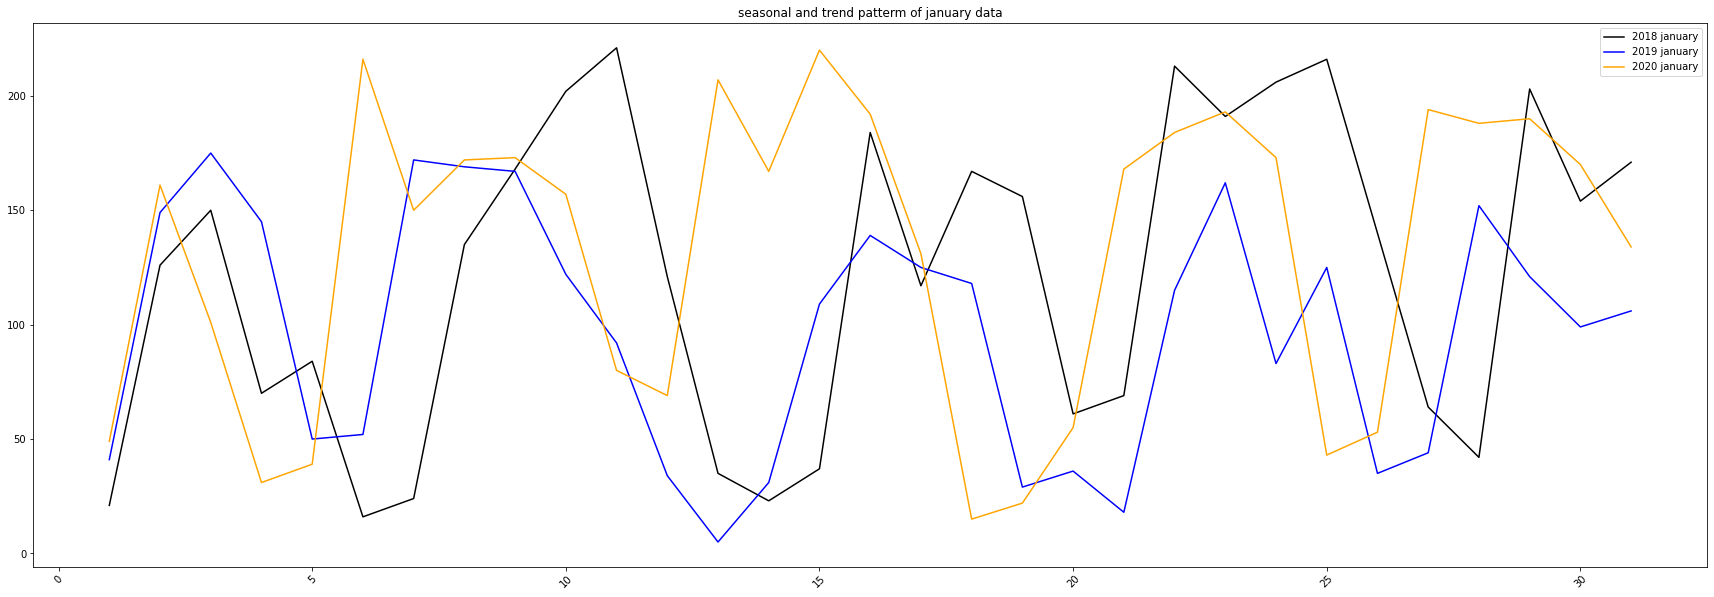

In [15]:
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(rotation=45)
plt.title('seasonal and trend patterm of january data')
plt.plot(data_2018_jan['day'],data_2018_jan['number of users'],label='2018 january',color='black')
plt.plot(data_2019_jan['day'],data_2019_jan['number of users'],label='2019 january',color='blue')
plt.plot(data_2020_jan['day'],data_2020_jan['number of users'],label='2020 january',color='orange')
plt.legend()
plt.show()

In [0]:
!pip install fbprophet

In [0]:
from fbprophet import Prophet

In [0]:
data1=data[['date','number of users']]

In [0]:
data1.columns=['ds','y']

In [0]:
data_train=data1.iloc[0:-60,:]
data_test=data1.iloc[-60:,:]

In [21]:
len(data_test)

60

In [22]:
data_train.tail()

,ds,y
725,2019-12-27,73
726,2019-12-28,36
727,2019-12-29,15
728,2019-12-30,91
729,2019-12-31,88


In [0]:
model = Prophet()

In [24]:
model.fit(data_train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future_data = model.make_future_dataframe(periods=60, freq = 'd')

In [0]:
forecast_data = model.predict(future_data)

In [27]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
785,2020-02-25,168.824310,100.701658,235.951455
786,2020-02-26,170.980929,102.293505,232.842272
787,2020-02-27,164.026382,97.685371,226.791153
788,2020-02-28,128.367753,68.524928,190.843905
789,2020-02-29,32.283568,-31.637562,97.060851


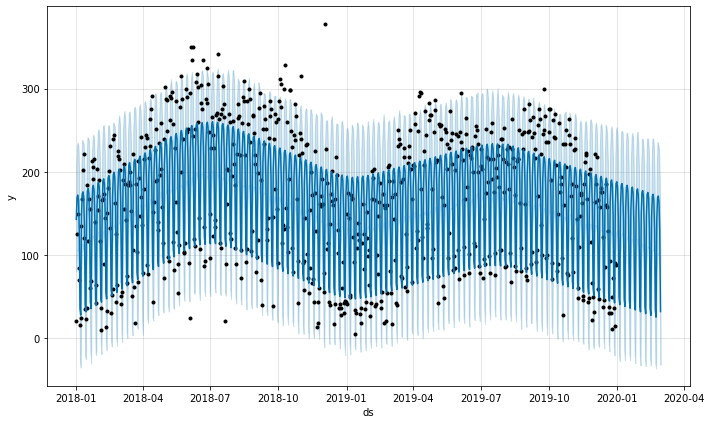

In [32]:
model.plot(forecast_data)
plt.show()

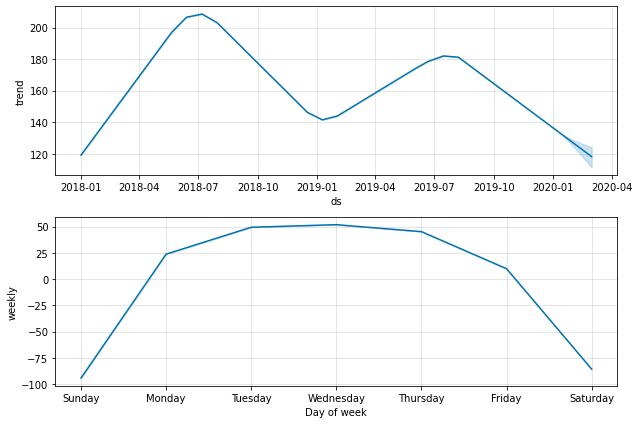

In [31]:
model.plot_components(forecast_data)
plt.show()

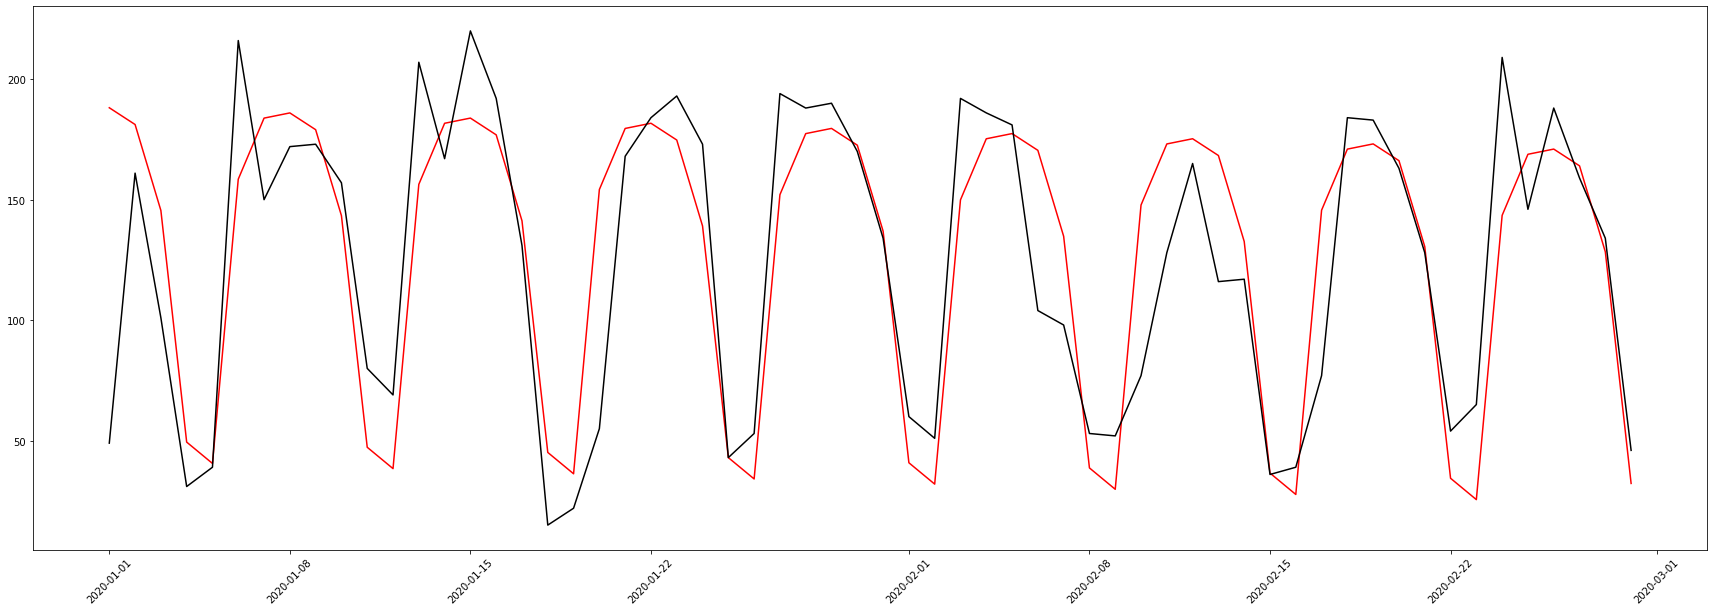

In [30]:
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(rotation=45)
plt.plot(forecast_data['ds'].iloc[-60:],forecast_data["yhat"].iloc[-60:],color='red')
plt.plot(data_test['ds'],data_test["y"],color='black')


In [35]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='60 days', period='60 days', horizon = '60 days')
df_cv.head()

INFO:fbprophet:Making 11 forecasts with cutoffs between 2018-03-11 00:00:00 and 2019-11-01 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-03-12,167.623662,119.315320,213.831260,184,2018-03-11
1,2018-03-13,212.724953,162.629792,257.645412,188,2018-03-11
2,2018-03-14,203.325996,154.894522,252.366145,200,2018-03-11
3,2018-03-15,210.127120,161.970381,258.509582,184,2018-03-11
4,2018-03-16,149.727928,102.167135,199.101808,153,2018-03-11


In [37]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,2105.326790,45.883840,34.245062,0.302329,0.146351,0.878788
1,7 days,2669.967186,51.671725,38.081384,0.333311,0.168665,0.833333
2,8 days,3141.315842,56.047443,41.606302,0.367366,0.217716,0.787879
3,9 days,4138.969064,64.334820,47.240596,0.487891,0.259557,0.727273
4,10 days,5050.216405,71.064875,52.512645,0.658968,0.311747,0.666667


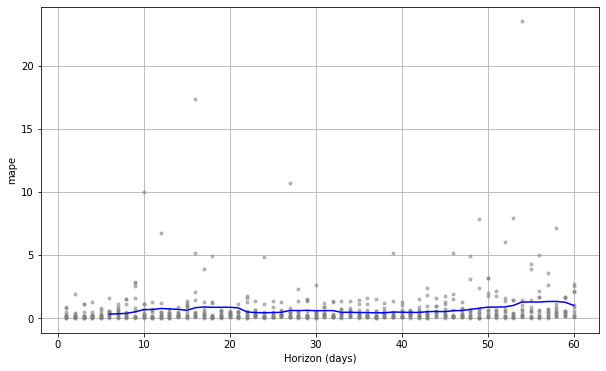

In [38]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')